##### 순환신경망
시퀀스 및 시계열 데이터에 대한 학습 통해 예측 수행하기 위한 인공신경망 구조

-> 자동 번역과 같은 자연어 인식 및 처리, 주식거래, 문장 및 문서 인식 등고 같이 연속적이고 순서에 의미있는 데이터 처리에 유용

은닉층의 결과를 다음 상위층으로도 보내면서 다시 현재 은닉층에서의 다음 계산 입력으로 보낼 수 있도록 순환적 구조 가지고 있는 신경망

각각의 노드들은 외부의 입력과 함께 자신의 이전 상태를 받아 자신의 현재 상태 갱신

##### 순환 뉴런
각 타임 스텝마다 직전 다임스텝의 출력을 입력받고 계산 결과인 출력을 상위층으로 내보내고 이와 함께 자기 자신에게도 그 출력 보냄

##### 순환 뉴런의 층 (순환 뉴런으로 구성된 층)
각 타임 스텝마다 해당 층의 모든 뉴런들은 하위층의 입력과 직전 타임 스텝의 출력을 입력받음

##### 메모리 셀
순환 뉴런은 이전의 타임 스텝에서 발생한 결과를 입력으로 받아 이를 기반으로 출력이 결정

타임 스텝(과거)의 상태를 기억하고 있기 때문에 순환 뉴런 / 순환 뉴런들의 층 을 메모리 셀이라 부름

순환 뉴런은 출력과 이전상태가 구분될 수 있으며 입력과 이전상태가 들어가 현재상태가 갱신됨

현재상태는 이전 n개의 타임스텝들의 입력과 상태들을 이용해 갱신

##### 시퀀스 입출력의 형태
1)연속적인 입력을 받아 연속적인 출력 생성

시퀀스 투 시퀀스 형태 (ex) 8/19 ~ 8/21 까지의 주식 데이터 받아 8/20 부터 8/22 까지의 주식 예측

2)연속적인 입력에 대해 중간의 연속적인 출력은 무시하고 마지막 결과만 유효한 출력으로 간주

시퀀스 투 벡터 형태 (ex) 사용자 리뷰에 있는 3개의 단어 '추천해요','굉장히','좋다' 입력받아 추천점수 95점 출력

3)처음의 입력만 유효한 입력으로 간주해 출력시퀀스 내보냄

벡터 투 시퀀스 (ex) 고양이 이미지 파일을 입력 받아서 그 이미지에 대한 캡션들 'cat','cute','meow' 출력

4)시퀀스 투 벡터 망 과 벡터 투 시퀀스 연결해 입력 시퀀스에 대해 지연된 출력 시퀀스 내보냄

지연된 시퀀스 투 시퀀스 (ex) 한국어 문장을 영어로 번역

In [ ]:
import numpy as np
s = np.sin(2*np.pi * 0.125 *np.linspace(0,20,100))
X,y=[],[]
for i in range(3,len(s)):
  X.append(np.array([s[i-j] for j in range(3,0,-1)]))
  y.append(s[i])


X= np.array(X).reshape(len(X),3,1)
y=np.array(y).reshape(len(y),1)

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=10,input_shape=(3,1)))
model.add(Dense(units=1, activation='tanh'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='sgd',metrics=['accuracy','mse'])

In [ ]:
model.fit(X,y, epochs=10, batch_size=10,verbose=2)

Epoch 1/10
10/10 - 23s - loss: 0.0977 - accuracy: 0.0000e+00
Epoch 2/10
10/10 - 0s - loss: 0.0796 - accuracy: 0.0000e+00
Epoch 3/10
10/10 - 0s - loss: 0.0715 - accuracy: 0.0000e+00
Epoch 4/10
10/10 - 0s - loss: 0.0668 - accuracy: 0.0000e+00
Epoch 5/10
10/10 - 0s - loss: 0.0632 - accuracy: 0.0000e+00
Epoch 6/10
10/10 - 0s - loss: 0.0601 - accuracy: 0.0000e+00
Epoch 7/10
10/10 - 0s - loss: 0.0578 - accuracy: 0.0000e+00
Epoch 8/10
10/10 - 0s - loss: 0.0558 - accuracy: 0.0000e+00
Epoch 9/10
10/10 - 0s - loss: 0.0538 - accuracy: 0.0000e+00
Epoch 10/10
10/10 - 0s - loss: 0.0519 - accuracy: 0.0000e+00


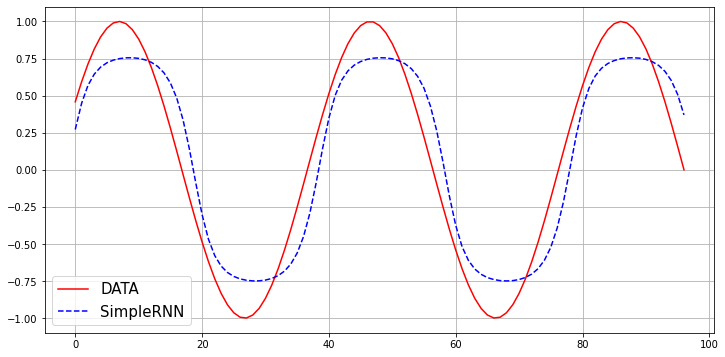

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(s[3:],color='red',label='DATA')
plt.plot(model.predict(X),color='blue',linestyle='--',label='SimpleRNN')
plt.grid()
plt.legend(fontsize=15)

##### RNN의 문제점 : 입력 시퀀스가 길어질수록 타임 스텝의 수가 많아지므로 타임 스텝에 따라 펼친 네트워크가 매우 깊어짐.

이와같이 시간 차원에서 발생하는 그래디언트 소실을 장기의존성의 문제라고 한다.

## 장단기 메모리 : LSTM (Long Short Term Memory)
장기 의존성 문젤르 해결하기 위해 도입된 발전형 RNN으로, 오랜 기간동안 필요한 정보들만을 기억하기 위해 게이트 개념 추가

@셀 상태의 추가

이전 상태는 단기 기억상태로 관리하고, 메모리 셀 상태를 장기 상태로 추가

셀 상태는 모듈의 전체 체인 관통해 정보 전달

@게이트 연산

셀 상태에 정보 선택적으로 추가하거나 삭제하는 스위치 역할 하며 입력, 망각, 출력의 3가지.

연산 자체는 시그모이드 층의 결과에 대한 곱셈이며, 시그모이드 결과 값이 1이면 모든 정보 유지, 0이면 모든 정보 제거

--장단기 메모리 수행 절차--
1)장기 기억이 망각 게이트 거쳐 일부 기억 망각

2)입력 게이트에서 선택한 기억 추가해 장기 기억 갱신

3)장기 기억의 복사본이 출력 게이트 거쳐 단기 기억 생성

@망각 게이트

현재 입력값과 이전 단기 상태를 받아 이전 셀의 정보 망각할 것인지 결정

시그모이드 결과. 0과 1 사이의 값이 나옴. 1에 가까울수록 이전 정보 많이 기억

@입력 게이트

현재 입력값과 이전 단기 상태 받아 현재 셀에 얼마나 반영할지 결정

시그모이드 결과. 0과 1 사이의 값이 나옴. 1에 가까울수록 이전 정보 많이 반영

@처리 게이트

현재 입력값과 이전 단기 상태 받아 현재 셀 상태값 후보 생성

tahn결과. -1과 1 사이의 값. 1에 가까울수록 현재 정보 비례해서 반영

@현재 셀 상태 갱신

망각 게이트와 입력 게이트로부터 계산된 값 통합해 현재 셀 상태 갱신

결과적으로 현재 셀 상태는 이전 셀 상태에서 일부 망각하고 현재 입력 값 일부 추가한 결과

@출력 게이트

현재 입력 값과 이전 단기 상태 받아 여과해 출력할 부분 결정

갱신된 현재 셀의 상태값을 -1과 1 사이로 조절한 뒤 출력 게이트의 값 곱해 현재 단기 상태 출력

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=10000)

#pad_sequences 이용해 데이터 문장 길이 동일하게 맞춰줌
X_train = sequence.pad_sequences(X_train,maxlen=50)
X_test = sequence.pad_sequences(X_test,maxlen=50)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [ ]:
X_train.shape

(25000, 50)

In [ ]:
y_train.shape

(25000,)

In [ ]:
data = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
data

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
data2 = {value+3 :key for key,value in data.items()}

In [ ]:
for idx,token in enumerate(('<pad','<sos>','<unk>')):
  data2[idx]=token

# (0,'<pad>') , (1,'<sos>') ,,,
#data2[0]='<pad>'


In [ ]:
for j in range(5):
  print(' '.join([data2[i] for i in X_train[j]]))
  print(y_train[j])
  print()

grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all
1

boobs and <unk> taking away bodies and the gym still doesn't close for <unk> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
0

must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how <unk> this is to watch save yourself an hour a bit of your life
0

man to see a film that is true to scotland this one is probably unique if you maybe <unk> on it deeply enough you might even re <unk> the power of storytelling and the age old question of whether there are some truths that cannot be told but only experienced

In [ ]:
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.layers import LSTM,Dense

model = Sequential()
#임베딩 (사람이 쓰는 자연어를 기계가 이해할 수 있는 숫자형태인 vector로 바꾼 결과/과정) => 결과 : 각 차원이(input_dim, input_length, output_dim) 형태인 3차원 배열
model.add(Embedding(input_dim=10000,output_dim=32,input_length=50))
#units : 해당 층에 배치할 노드 수
model.add(LSTM(units=100))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=64,verbose=2)

Epoch 1/10
391/391 - 44s - loss: 0.4835 - accuracy: 0.7606
Epoch 2/10
391/391 - 24s - loss: 0.3335 - accuracy: 0.8550
Epoch 3/10
391/391 - 24s - loss: 0.2858 - accuracy: 0.8826
Epoch 4/10
391/391 - 24s - loss: 0.2433 - accuracy: 0.9034
Epoch 5/10
391/391 - 24s - loss: 0.2034 - accuracy: 0.9211
Epoch 6/10
391/391 - 24s - loss: 0.1617 - accuracy: 0.9397
Epoch 7/10
391/391 - 24s - loss: 0.1253 - accuracy: 0.9546
Epoch 8/10
391/391 - 24s - loss: 0.0924 - accuracy: 0.9686
Epoch 9/10
391/391 - 24s - loss: 0.0748 - accuracy: 0.9742
Epoch 10/10
391/391 - 24s - loss: 0.0593 - accuracy: 0.9803


In [ ]:
loss,acc=model.evaluate(X_test,y_test)

782/782 [==============================] - 12s 14ms/step - loss: 0.9797 - accuracy: 0.7766


In [ ]:
print('손실값:',round(loss,3))
print('정확도:',round(acc,3))

손실값: 0.98
정확도: 0.777


In [ ]:
y_pred = model.predict(X_test)
print(y_pred[100:103])

[[0.23441029]
 [0.00147617]
 [0.7485411 ]]


In [ ]:
y_pred_class = model.predict_classes(X_test)
print(y_pred_class[100:103])

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[0]
 [0]
 [1]]


##로이터 뉴스 데이터 이용

In [ ]:
from keras.datasets import reuters

(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=10000,test_split=0.3)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
X_train.shape

(7859,)

In [ ]:
X_test.shape

(3369,)

In [ ]:
import numpy as np
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
data1 = reuters.get_word_index()

565248/550378 [==============================] - 0s 0us/step


In [ ]:
data1

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [ ]:
data2 = {value+3 :key for key,value in data1.items()}

In [ ]:
for idx,token in enumerate(('<pad','<sos>','<unk>')):
  data2[idx]=token

In [ ]:
for j in range(5):
  print(' '.join([data2[i] for i in X_train[j]]))
  print(y_train[j])
  print()

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3

<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3
4

<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one s

In [ ]:
from keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train,maxlen=100)
X_test = sequence.pad_sequences(X_test,maxlen=100)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train,46)
y_test=to_categorical(y_test,46)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000,output_dim=32,input_length=100))
model.add(LSTM(units=100))
model.add(Dense(units=46,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=100,verbose=2)

Epoch 1/10
79/79 - 18s - loss: 2.6397 - accuracy: 0.3387
Epoch 2/10
79/79 - 15s - loss: 2.3236 - accuracy: 0.3816
Epoch 3/10
79/79 - 15s - loss: 1.9318 - accuracy: 0.4923
Epoch 4/10
79/79 - 15s - loss: 1.7555 - accuracy: 0.5292
Epoch 5/10
79/79 - 15s - loss: 1.6628 - accuracy: 0.5555
Epoch 6/10
79/79 - 15s - loss: 1.5919 - accuracy: 0.5829
Epoch 7/10
79/79 - 15s - loss: 1.5039 - accuracy: 0.6100
Epoch 8/10
79/79 - 15s - loss: 1.4143 - accuracy: 0.6349
Epoch 9/10
79/79 - 15s - loss: 1.3170 - accuracy: 0.6620
Epoch 10/10
79/79 - 15s - loss: 1.2313 - accuracy: 0.6843


In [ ]:
loss,acc=model.evaluate(X_test,y_test)

106/106 [==============================] - 3s 25ms/step - loss: 1.5338 - accuracy: 0.6186


In [ ]:
print('손실값:',round(loss,3))
print('정확도:',round(acc,3))

손실값: 1.534
정확도: 0.619


In [ ]:
y_pred = model.predict(X_test)
print(y_pred[100:103])

[[1.77724636e-04 6.14709395e-04 4.77497961e-05 3.47668268e-02
  9.44982827e-01 1.31483630e-05 2.59598037e-05 6.68210560e-05
  1.04695011e-03 4.80189083e-05 1.04689570e-04 2.29317535e-04
  5.96047175e-05 2.94568628e-04 8.93619381e-06 1.55332400e-05
  1.11584933e-02 1.09691662e-03 4.87459874e-05 6.26256282e-04
  2.21979804e-03 1.12836962e-04 8.91862965e-06 7.87553217e-05
  3.84153100e-05 1.47283121e-04 2.97113347e-05 4.49268700e-05
  3.93859809e-05 9.30396054e-05 1.55898524e-04 6.22314619e-05
  4.05666797e-05 1.95521425e-05 5.18242086e-05 5.27877164e-05
  9.45556094e-05 5.04054224e-05 8.13020233e-05 8.30350560e-04
  1.20074350e-04 1.56378723e-04 1.20221421e-05 6.40994995e-06
  1.12976886e-05 7.54654639e-06]
 [2.61891820e-03 3.64173041e-03 7.87397672e-04 4.24728207e-02
  4.71064657e-01 4.04216466e-04 9.26090579e-04 6.10267743e-04
  9.60247219e-03 8.34849023e-04 1.29367714e-03 4.69950493e-03
  6.12563104e-04 9.49454214e-03 1.56404145e-04 3.75337026e-04
  3.43512416e-01 1.48506388e-02 6.364

In [ ]:
y_pred_class = model.predict_classes(X_test)
print(y_pred_class[100:103])

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[4 4 3]
